In [2]:
import os
os.chdir("C:\\Users\\Adhvaidh\\Desktop\\ML DATASETS\\LOGISTIC REG")

import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)


# import libraries for model validation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix

In [27]:
df = pd.read_csv("Attrition.csv")
df.shape

(14999, 11)

In [28]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,satisfaction,left
0,0.38,0.53,2,157,3,0,0,sales,low,Med,Yes
1,0.80,0.86,5,262,6,0,0,sales,medium,High,Yes
2,0.11,0.88,7,272,4,0,0,sales,medium,low,Yes
3,0.72,0.87,5,223,5,0,0,sales,low,High,Yes
4,0.37,0.52,2,159,3,0,0,sales,low,Med,Yes


In [29]:

df.number_project.value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

In [30]:

df.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [31]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [32]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department', 'salary', 'satisfaction',
       'left'],
      dtype='object')

In [62]:
X=df.iloc[:,:10]
y=df.iloc[:,10]

In [38]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,satisfaction
0,0.38,0.53,2,157,3,0,0,sales,low,Med
1,0.80,0.86,5,262,6,0,0,sales,medium,High
2,0.11,0.88,7,272,4,0,0,sales,medium,low
3,0.72,0.87,5,223,5,0,0,sales,low,High
4,0.37,0.52,2,159,3,0,0,sales,low,Med


## Check Missing Values

In [39]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
satisfaction             0
left                     0
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
satisfaction             14999 non-null object
left                     14999 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 1.3+ MB


- There are only 891 rows in the titanic data frame. Cabin is almost all missing values, so we can drop that variable completely
- Age seems like a relevant predictor for survival right? We'd want to keep the variables, but it has 177 missing values.

### Sex column

In [63]:
X['department'] = pd.get_dummies(X.department)
X['salary'] = pd.get_dummies(X.department)
X['satisfaction'] = pd.get_dummies(X.department)

In [65]:
y= pd.get_dummies(y)

In [68]:
y=y.drop(['No'],axis=1)

### Standardizing average_montly_hours variable

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)


**Encoding the categorical variables and Standardizing the Continuous Variables are Hygiene Steps**

# Model Building

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [85]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(11999, 10)
(3000, 10)
(11999, 1)
(3000, 1)


In [87]:
from sklearn.linear_model import LogisticRegression

# fit the model to the training data
model=LogisticRegression()
model.fit(X_train,y_train)

print (model.intercept_)
print (model.coef_)



[-1.51832028]
[[-1.03732302  0.1199873  -0.37226775  0.23994303  0.32746338 -0.51753018
  -0.25803113 -0.01186632  0.01186632  0.01186632]]


C:\Users\Adhvaidh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# Prediction

In [88]:
print ()
display (model.predict_proba(X_test)[:10]) # prob
print ()
display (model.predict(X_test)[:10]) # classification

array([[0.96408779, 0.03591221],
       [0.93729224, 0.06270776],
       [0.80613479, 0.19386521],
       [0.59298672, 0.40701328],
       [0.98542383, 0.01457617],
       [0.79380835, 0.20619165],
       [0.99012625, 0.00987375],
       [0.21786138, 0.78213862],
       [0.71834018, 0.28165982],
       [0.36314144, 0.63685856]])

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=uint8)

In [89]:
# compute the accuracy of our predictions
from sklearn.metrics import accuracy_score
print ("Logistic testing accuracy is %2.2f" % accuracy_score(y_test,model.predict(X_test)))

Logistic testing accuracy is 0.76


In [90]:
print ("Logistic training accuracy is %2.2f" % accuracy_score(y_train,model.predict(X_train)))

Logistic training accuracy is 0.77


<h2>ROC Curve</h2>

In [91]:
from sklearn.metrics import roc_auc_score
# lets measure the logistic model AUC
logistic_roc_auc = roc_auc_score(y_test, model.predict(X_test)) 
logistic_roc_auc

0.5737000822443571

In [92]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

In [93]:
model.predict_proba(X_test)[:,1][:5] # P(Y=1)

array([0.03591221, 0.06270776, 0.19386521, 0.40701328, 0.01457617])

In [94]:
display (thresholds[:10])
display (fpr[:10])
display (tpr[:10])

array([1.91486357, 0.91486357, 0.857705  , 0.84853726, 0.82513587,
       0.8242676 , 0.76461205, 0.76387278, 0.74532432, 0.74267653])

array([0.        , 0.00087184, 0.00174368, 0.00174368, 0.00348736,
       0.0043592 , 0.01438535, 0.01438535, 0.01569311, 0.01569311])

array([0.        , 0.        , 0.        , 0.00141643, 0.00141643,
       0.00141643, 0.00141643, 0.00283286, 0.00283286, 0.00708215])

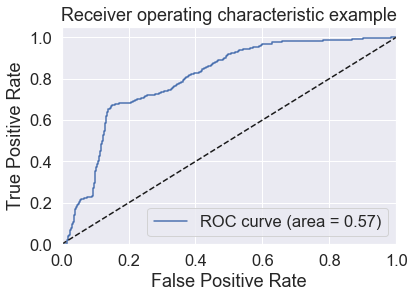

Logistic AUC = 0.57 


In [95]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % logistic_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc ="lower right")
plt.show()
print("Logistic AUC = %2.2f " % logistic_roc_auc )